In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\\Users\\devesh\\Desktop\\Git Repositories\\Python-Notes\\Pandas\\FL_insurance_sample.csv")

In [5]:
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [6]:
mode_data= df['construction'].mode()

In [7]:
print(mode_data)

0    Wood
dtype: object


In [8]:
mean_data= df['point_latitude'].mean()

In [9]:
print(mean_data)

28.087476512228815


In [10]:
median= df['point_latitude'].median()

In [12]:
print(median)

28.057077


In [13]:
# if there is an outlier in the data , median is an effective method of determining where the data entry went wrong.

In [14]:
# i am making a few changes in the above file to show how we can determine the presence of an outlier

In [17]:
df1= pd.read_csv('C:\\Users\\devesh\\Desktop\\Git Repositories\\Python-Notes\\Statistics for DS\\sample.csv')

In [18]:
df1.tail()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
36629,404309,FL,PINELLAS COUNTY,0.0,88722.0,0.0,88722.0,88722.0,155065.65,0.0,0.0,0.0,0,2.812288e+01,-82.770218,Residential,Wood,3
36630,465875,FL,PINELLAS COUNTY,1297057.5,1297057.5,1297057.5,1297057.5,1297057.5,1577500.79,0.0,0.0,0.0,0,2.808090e+01,-82.758800,Residential,Masonry,1
36631,791209,FL,PINELLAS COUNTY,173286.9,173286.9,0.0,0.0,173286.9,205527.97,0.0,0.0,0.0,0,2.811055e+01,-82.766360,Residential,Wood,4
36632,322627,FL,PINELLAS COUNTY,1499781.6,1499781.6,0.0,0.0,1499781.6,1768782.43,0.0,0.0,0.0,0,2.808942e+01,-82.697411,Residential,Masonry,3
36633,398149,FL,PINELLAS COUNTY,373488.3,373488.3,0.0,0.0,373488.3,596003.67,0.0,0.0,0.0,0,2.800000e+06,-82.774590,Residential,Masonry,1


In [19]:
df1['point_latitude'].mean()   #irregular mean

104.51844052271089

In [20]:
df1['point_latitude'].mode()   # unaffected mode 

0    30.3349
dtype: float64

In [22]:
df1['point_latitude'].median()   #unaffected median because quantity is added at the last

28.057077

#### now we will calculate quartiles to determine the part where we put in the wrong value

In [24]:
Q1= df1['point_latitude'].quantile(0.25)

In [25]:
Q2= df1['point_latitude'].quantile(0.5)

In [26]:
Q3= df1['point_latitude'].quantile(0.75)

In [27]:
Q4= df1['point_latitude'].quantile(1)

In [31]:
print('1st Quartile', Q1)
print('2nd Quartile', Q2)
print('3rd Quartile', Q3)
print('----------------------')
print('4th Quartile', Q4)

1st Quartile 26.471996250000004
2nd Quartile 28.057077
3rd Quartile 29.623005
----------------------
4th Quartile 2800000.0


#### here we can we that value of the last quartile is abnormal, thus there is the mistake

## Range of the Original DF

In [44]:
max_data1= df['point_latitude'].max()
min_data1= df['point_latitude'].min()
range_data= max_data1 - min_data1
print(range_data)     #will come out abnormal

6.4423059999999985


## Range of the tampered DF

In [45]:
max_data= df1['point_latitude'].max()
min_data= df1['point_latitude'].min()
range_data= max_data - min_data
print(range_data)     #will come out abnormal

2799975.452486


## Calculating IQR for Tampered DF

In [46]:
Q1= df1['point_latitude'].quantile(0.25)
Q3= df1['point_latitude'].quantile(0.75)

In [47]:
IQR= Q3 -Q1

In [48]:
print(IQR)

3.1510087499999955


In [49]:
# Range and IQR are somewhat comparable now

## Calculating the variance

In [50]:
# calculate mean
# calculate the distance of mean from each element 
# square those distances
# take average of the squared values

In [51]:
 mean = df1['point_latitude'].mean()

In [53]:
difference = df1['point_latitude'] - mean  # subtracting mean from the list of point_latitude

In [54]:
squared_diff= difference**2

In [55]:
variance= squared_diff.mean()

In [56]:
print(variance)

213998711.73843446


In [60]:
SD= variance**(1/2)

In [61]:
print(SD)

14628.6948063877


In [57]:
# calculating varianve using function

In [58]:
variance1= df1['point_latitude'].var(ddof=0)

In [59]:
print(variance1)

213998711.73843446


In [62]:
SD1=variance1**(1/2)

In [63]:
print(SD1)

14628.6948063877


# frequency table

In [64]:
freq_table= df['county'].value_counts()

In [65]:
print(freq_table)

MIAMI DADE COUNTY    4315
BROWARD COUNTY       3193
PALM BEACH COUNTY    2791
DUVAL COUNTY         1894
ORANGE COUNTY        1811
                     ... 
GLADES COUNTY          22
UNION COUNTY           15
OSCEOLA COUNTY          1
Orlando                 1
North Fort Myers        1
Name: county, Length: 67, dtype: int64


In [66]:
freq_table1= df['point_granularity'].value_counts()
print(freq_table1)

1    26569
3     6724
4     3337
7        2
5        2
Name: point_granularity, dtype: int64


## Histograms

##### using matplotlib 

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

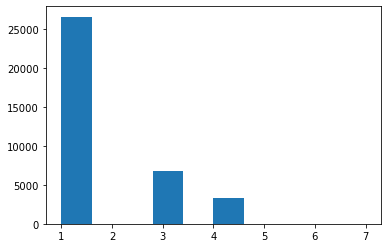

In [74]:
plt.hist(x='point_granularity', data=df)
plt.show()

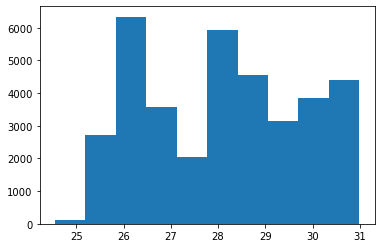

In [78]:
plt.hist(x='point_latitude', data=df)
plt.show()

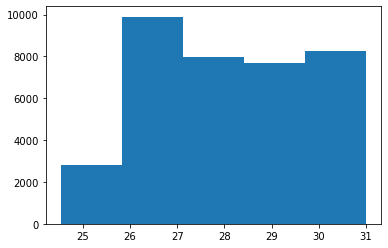

In [79]:
plt.hist(x='point_latitude', data=df,bins=5)
plt.show()